# Trabajo Integrador - Bootcamp Data Science

**Estudiante**: Orlando Velásquez

El trabajo integrador consiste en desarrollar un proceso de Ciencia de Datos sobre un escenario relacionado con los pagos de una entidad financiera.

## Análisis Exploratorio

Esta sección contiene el análisis exploratorio de los datos.

Se definen las columnas con sus tipos de datos y luego un análisis de cada característica.

Importamos las dependencias del proyecto con las que vamos a trabajar

In [ ]:
##librerias##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter
import warnings;
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("data.csv")
df = df.set_index('ID')
df.head()

In [ ]:
##INFORMACION DE LOS DATOS##
df.info()

**Todos los campos son numéricos, y no existen valores nulos ya que no se permiten.**

In [ ]:
df.describe().round()

## VARIABLES
Realizamos el análisis exploratorio por cada variable para conocer sus valores, y distribuciones

In [ ]:
df['LIMIT_BAL'].describe()

In [ ]:
##Grafico CAJA BIGOTE
df['LIMIT_BAL'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='LIMIT_BAL')

In [ ]:
sns.displot(data=df, x='LIMIT_BAL', kind="kde")

A partir del analisis de la distribución de la variable LIMIT_BAL, se evidencia una concentración del conjunto de datos en el intervalo [0,600000] aproximadamente.
Los valores superiores a 600000 podrían ser considerados como **atípicos**

In [ ]:
df['SEX'].describe()

In [ ]:
df['SEX'].value_counts()

In [ ]:
df['SEX'].value_counts().plot(kind="bar")

Al ser una variable de solo dos valores, se revisa qué valor pesa más. En este caso, el valor 2. 

In [ ]:
df['EDUCATION'].describe()

In [ ]:
df['EDUCATION'].value_counts()

In [ ]:
##Grafico CAJA BIGOTE
df['EDUCATION'].plot(kind="box")

In [ ]:
df['EDUCATION'].value_counts().plot(kind="bar")

Se puede extraer de los gráficos que la mayor concentración está en el intervalo [1,3], y que los valores sobre 3 son marginales.

In [ ]:
df['MARRIAGE'].describe()

In [ ]:
df['MARRIAGE'].value_counts()

In [ ]:
df['MARRIAGE'].value_counts().plot(kind="bar")

Al ser dos valores predominantes según el conteo, se puede extraer que los valores distintos de 1 y 2 son marginales, y que ambos tienen un peso similar.

In [ ]:
df['AGE'].describe()

In [ ]:
sns.displot(data=df, x="AGE", kind = "ecdf")

In [ ]:
df['AGE'].value_counts().plot(kind="bar")

In [ ]:
df["AGE"].plot(kind="box")

La variable AGE varía en el intervalo [20,60], considerando los valores mayores a 60 son marginales.

In [ ]:
bloque1 = [ 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]
for columns in bloque1:
    plt.hist(df[columns], bins=20)
    plt.title(columns) , plt.xlabel("Meses de Retraso en el Pago"), plt.ylabel("Q de Clientes")
    plt.show()

In [ ]:
sns.displot(data=df, y='PAY_0', kind="ecdf")

Esta variable muestra mayor distribución del total en el valor 0, con una notoria proporción.

In [ ]:
sns.displot(data=df, y='PAY_2', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_3', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_4', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_5', kind="ecdf")

In [ ]:
sns.displot(data=df, y='PAY_6', kind="ecdf")

In [ ]:
df['BILL_AMT1'].describe()

In [ ]:
df['BILL_AMT1'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT1', kind="kde")

In [ ]:
df['BILL_AMT2'].describe()

In [ ]:
df['BILL_AMT2'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT2', kind="kde")

In [ ]:
df['BILL_AMT3'].describe()

In [ ]:
df['BILL_AMT3'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT3', kind="kde")

In [ ]:
df['BILL_AMT4'].describe()

In [ ]:
df['BILL_AMT4'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT4', kind="kde")

In [ ]:
df['BILL_AMT5'].describe()

In [ ]:
df['BILL_AMT5'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT5', kind="kde")

In [ ]:
df['BILL_AMT6'].describe()

In [ ]:
df['BILL_AMT6'].plot(kind="box")

In [ ]:
sns.displot(data=df, x='BILL_AMT6', kind="kde")

In [ ]:
df['PAY_AMT1'].describe()

In [ ]:
df['PAY_AMT1'].plot(kind='hist')

In [ ]:
df['PAY_AMT1'].plot(kind='box')

In [ ]:
df['PAY_AMT2'].describe()

In [ ]:
df['PAY_AMT2'].plot(kind='hist')

In [ ]:
df['PAY_AMT2'].plot(kind='box')

In [ ]:
df['PAY_AMT3'].describe()

In [ ]:
df['PAY_AMT3'].plot(kind='hist')

In [ ]:
df['PAY_AMT3'].plot(kind='box')

In [ ]:
df['PAY_AMT4'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT4', kind="hist")

In [ ]:
df['PAY_AMT5'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT5', kind="hist")

In [ ]:
df['PAY_AMT6'].describe()

In [ ]:
sns.displot(data=df, x='PAY_AMT6', kind="hist")

In [ ]:
df['default.payment.next.month'].value_counts()

In [ ]:
df['default.payment.next.month'].value_counts().plot(kind="bar")

In [ ]:
corr = df.corr()
plt.figure(figsize = (25,10))
cmap = sns.diverging_palette(200, 20, as_cmap=False)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Matriz de Correlación de Calor')

Las variables que más correlación tienen son: PAY_X con BILL_AMTX y LIMIT_BAL con BILL_AMTX

Las variables con menos correlación son: PAY_X con LIMIT_BAL

## PROCESAMIENTO

In [ ]:
x = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']
#COMPROBAR DATASET SIN VARIABLE RESPUESTA
x

In [ ]:
columnas_num = x.select_dtypes(include=['float64', 'int64']).columns
#EXCLUSION DE VARIABLES CATEGÓRICAS
excluir = ['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
columnas_num = [col for col in columnas_num if col not in excluir]
columnas_num

In [ ]:
ss = StandardScaler()
x[columnas_num] = ss.fit_transform(x[columnas_num])
x

## ENTRENAMIENTO

In [102]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.30,random_state=0)
print(len(x_train))
print(len(x_test))

21000
9000


### Modelo Regresión Logística

In [103]:
mod1 = LogisticRegression(solver='lbfgs',
                            max_iter=  100,
                            penalty='l2',
                            class_weight=None,
                            random_state=16)
mod1.fit(x_train, y_train)
predicciones = mod1.predict(X = x_test,)
Matriz_confusion = confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
accuracy = mod1.score(x, y)
print("Intercept:", mod1.intercept_) # b0
print("Coeficiente:", list(zip(x.columns, mod1.coef_.flatten(), ))) # b1
print("Exactitud de entrenamiento:", mod1.score(x, y)) # Cuanto datos clasifico correctamente
print("Matriz de confusión")
print('')
print(Matriz_confusion)
print('')
print(f"La precisión global es: {100 * accuracy}%")

Intercept: [-0.68631786]
Coeficiente: [('LIMIT_BAL', -0.08473425462829157), ('SEX', -0.13310557628128136), ('EDUCATION', -0.12809010244287267), ('MARRIAGE', -0.17260368798996192), ('AGE', 0.06595398567304314), ('PAY_0', 0.5280528881496807), ('PAY_2', 0.10482537015198774), ('PAY_3', 0.07015155737396746), ('PAY_4', 0.003832922135454087), ('PAY_5', 0.03202258356561093), ('PAY_6', 0.0460604498022514), ('BILL_AMT1', -0.52184908556741), ('BILL_AMT2', 0.1474030645992092), ('BILL_AMT3', 0.19686141253707076), ('BILL_AMT4', 0.0350779297428381), ('BILL_AMT5', 0.014236636919709632), ('BILL_AMT6', 0.0443715900455434), ('PAY_AMT1', -0.27990973622309995), ('PAY_AMT2', -0.2420515927582543), ('PAY_AMT3', -0.11549912516999505), ('PAY_AMT4', -0.06477265976070684), ('PAY_AMT5', -0.049445613828214434), ('PAY_AMT6', -0.042498920006576534)]
Accuracy de entrenamiento: 0.8102
Matriz de confusión

[[6897  163]
 [1493  447]]

La precisión global es: 81.02000000000001%


In [108]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.72


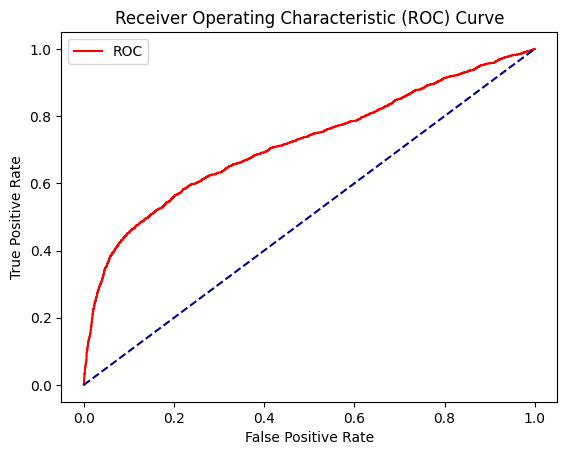

In [109]:
probs = mod1.predict_proba(x_test) 
probs = probs[:, 1] 
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs) 
print('AUC: %.2f' % auc) 
plot_roc_curve(fpr, tpr)  

### Arboles de Decisión

In [111]:
mod2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
mod2.fit(x_train, y_train)
mod2_score_train = mod2.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",mod2_score_train)
mod2_score_test = mod2.score(x_test, y_test)
print("Puntaje de Testeo: ",mod2_score_test)

Puntaje de Entrenamiento:  0.8168571428571428
Puntaje de Testeo:  0.826


*Optimización de Hiperparametros*

In [113]:
param = {'max_depth':[2,4,6,8,10]}
est = GridSearchCV(estimator=mod2, param_grid=param)
est.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
             param_grid={'max_depth': [2, 4, 6, 8, 10]})

In [114]:
est.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=1)

In [115]:
est.best_params_

{'max_depth': 4}

In [118]:
##Actualización de Mejor Estimador a 4 en máxima profundidad
mod2 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
mod2.fit(x_train, y_train)
mod2_score_train = mod2.score(x_train, y_train)
print("Puntaje de Entrenamiento: ",mod2_score_train)
mod2_score_test = mod2.score(x_test, y_test)
print("Puntaje de Testeo: ",mod2_score_test)
preds = mod2.predict(x_test)
print("\nPuntaje de Exactitud: \n{}".format(metrics.accuracy_score(y_test, preds)))
probs = mod2.predict_proba(x_test)[:,1]
print("\nArea Bajo la Curva: \n{}".format(metrics.roc_auc_score(y_test, probs)))


Puntaje de Entrenamiento:  0.8212857142857143
Puntaje de Testeo:  0.8258888888888889

Puntaje de Exactitud: 
0.8258888888888889

Area Bajo la Curva: 
0.7463975570222832


In [120]:
predicciones = mod2.predict(X = x_test,)

print("Matriz de confusión")
print("")
Matriz_confusion=confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)
print(Matriz_confusion)
print("")
accuracy = mod2.score(x, y)
print(f"La precisión global es: {100 * accuracy}%") 

Matriz de confusión

[[6747  313]
 [1254  686]]

La precisión global es: 82.26666666666667%


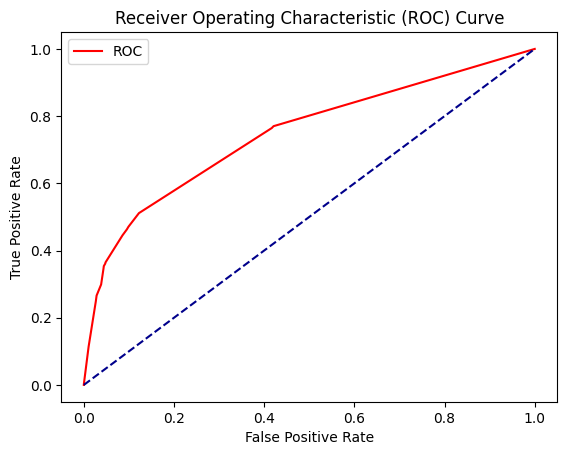

In [124]:
probs = mod2.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)